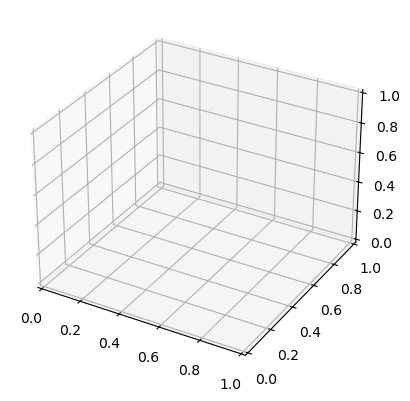

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

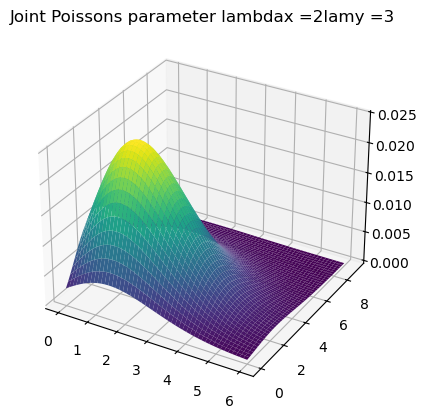

In [ ]:
## Poisson Probability of event occurring, given 2 event-based poission processes
import math
import numpy
from scipy.special import factorial
lamx = 2
lamy = 3
def f(x,y):
    return ((lamx**x * numpy.exp(-lam)) / factorial(x)) * (lamy**y * numpy.exp(-lam)) / factorial(y)


x = np.linspace(0,3*lamx,50)
y = np.linspace(0,3*lamy,50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title(f'Joint Poissons parameter lambdax ={lamx}lamy ={lamy}');
